In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import torch

In [3]:
PATH='ivr_data/rossmann/'

In [4]:
train_df = pd.read_feather(f'{PATH}joined')
test_df = pd.read_feather(f'{PATH}joined_test')

In [5]:
len(train_df),len(test_df)

(844338, 41088)

In [6]:
import sys
# sys.path.append("/mnt/azmnt/code/Users/bho829/fastai")
sys.path.append("/mnt/azmnt/code/Users/bho829/fastai/fastai")

In [7]:
from xfinity.fastai.tabular.transform import *

In [8]:
procs=[FillMissing, Categorify, Normalize]

In [41]:
vec_vars = []
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [42]:
train_df['CompetitionDistance'].head(20)

0      1270.0
1       570.0
2     14130.0
3       620.0
4     29910.0
5       310.0
6     24000.0
7      7520.0
8      2030.0
9      3160.0
10      960.0
11     1070.0
12      310.0
13     1300.0
14     4110.0
15     3270.0
16       50.0
17    13840.0
18     3240.0
19     2340.0
Name: CompetitionDistance, dtype: float64

In [77]:
len(train_df['DayOfWeek'].unique())

7

In [79]:
train_df['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [78]:
train_df.head()

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,0,1,5,2015-07-31,5263,555,1,1,False,1,...,57,0,0,0,5.0,0.0,5.0,7.0,0.0,5.0
1,1,2,5,2015-07-31,6064,625,1,1,False,1,...,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
2,2,3,5,2015-07-31,8314,821,1,1,False,1,...,57,0,0,0,5.0,0.0,5.0,5.0,0.0,5.0
3,3,4,5,2015-07-31,13995,1498,1,1,False,1,...,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
4,4,5,5,2015-07-31,4822,559,1,1,False,1,...,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0


In [73]:
len(cat_vars)

24

In [74]:
cat_vars

['Store',
 'DayOfWeek',
 'Year',
 'Month',
 'Day',
 'StateHoliday',
 'CompetitionMonthsOpen',
 'Promo2Weeks',
 'StoreType',
 'Assortment',
 'PromoInterval',
 'CompetitionOpenSinceYear',
 'Promo2SinceYear',
 'State',
 'Week',
 'Events',
 'Promo_fw',
 'Promo_bw',
 'StateHoliday_fw',
 'StateHoliday_bw',
 'SchoolHoliday_fw',
 'SchoolHoliday_bw',
 'CompetitionDistance_na',
 'CloudCover_na']

In [44]:
len(cont_vars)

16

In [45]:
dep_var = 'Sales'
df = train_df[vec_vars + cat_vars + cont_vars + [dep_var,'Date']].copy()

In [48]:
test_df['Date'].min(), test_df['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [49]:
cut = train_df['Date'][(train_df['Date'] == train_df['Date'][len(test_df)])].index.max()
cut

41395

In [50]:
train_df.shape

(844338, 93)

In [51]:
test_df.shape

(41088, 92)

In [52]:
valid_idx = range(cut)

In [53]:
valid_idx

range(0, 41395)

In [54]:
df[dep_var].head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [55]:
from xfinity.fastai.tabular.data import *

In [56]:
path = PATH

In [57]:
from xfinity.fastai.data_block import FloatList

In [58]:
data = (TabularList.from_df(df, path=path, vec_names=vec_vars, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                .add_test(TabularList.from_df(test_df, path=path, vec_names=vec_vars, cat_names=cat_vars, cont_names=cont_vars))
                .databunch())

In [59]:
type(data)

xfinity.fastai.tabular.data.TabularDataBunch

In [60]:
data.c

1

In [61]:
# data.x

In [62]:
# from xfinity.fastai.gen_doc.nbdoc import doc

# doc(FloatList)

In [63]:
from xfinity.fastai.torch_core import *

In [64]:

max_log_y = np.log(np.max(train_df['Sales'])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [65]:
from xfinity.fastai.tabular.learner import tabular_ext_learner

In [66]:
from xfinity.fastai.metrics import exp_rmspe

In [67]:
learn = tabular_ext_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=exp_rmspe)


In [68]:
learn.loss_func

FlattenedLoss of MSELoss()

In [69]:
# learn.data.train_dl

In [70]:
# for i, dl in enumerate(learn.data.train_dl):
#     if i > 0:
#         break
#     print('i={}'.format(i))
#     print(dl)


In [71]:
learn.model

TabularExtModel(
  (vecs): ModuleList()
  (vecs_drop): Dropout(p=0.04, inplace=False)
  (embeds): ModuleList(
    (0): Embedding(1116, 81)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(26, 10)
    (7): Embedding(27, 10)
    (8): Embedding(5, 4)
    (9): Embedding(4, 3)
    (10): Embedding(4, 3)
    (11): Embedding(24, 9)
    (12): Embedding(9, 5)
    (13): Embedding(13, 7)
    (14): Embedding(53, 15)
    (15): Embedding(22, 9)
    (16): Embedding(7, 5)
    (17): Embedding(7, 5)
    (18): Embedding(4, 3)
    (19): Embedding(4, 3)
    (20): Embedding(9, 5)
    (21): Embedding(9, 5)
    (22): Embedding(3, 3)
    (23): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04, inplace=False)
  (bn_cont): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=233, out_features=1000, bias=True)
    (1): ReLU(inplace=True)
   

In [34]:
# len(data.train_ds.cont_names)

In [35]:
learn.lr_find()

epoch,train_loss,valid_loss,exp_rmspe,time


epoch 0
self.sched.is_done=True
self.stop_div=True
smooth_loss=7.277245044708252
self.best_loss=7.277245044708252
torch.isnan(smooth_loss)=False
call break on epoch end
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


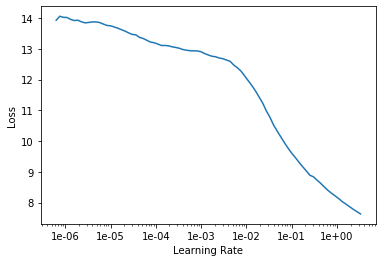

In [36]:
learn.recorder.plot()

In [72]:
learn.fit_one_cycle(5, 1e-3, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe,time


epoch 0
process n_embs
x_cat shape=torch.Size([64, 24])
x_cat=tensor([[1073,    4,    1,  ...,    2,    1,    1],
        [  16,    2,    2,  ...,    1,    1,    1],
        [ 289,    4,    2,  ...,    1,    1,    1],
        ...,
        [ 246,    3,    3,  ...,    3,    1,    1],
        [ 889,    4,    2,  ...,    1,    1,    1],
        [  96,    4,    2,  ...,    1,    1,    1]])
process n_cont
x_cont shape=torch.Size([64, 16])
x_cont=tensor([[-0.4794,  0.0130, -0.0956,  ...,  0.5687,  1.1119, -0.4796],
        [-0.2795,  1.2157,  1.4551,  ..., -1.2794,  1.1119, -0.4796],
        [ 0.1395,  1.5765,  1.5960,  ...,  0.9692,  1.1119, -0.4796],
        ...,
        [-0.1014,  0.0130,  0.0454,  ...,  1.0308,  1.1119, -0.4796],
        [ 1.6940,  1.8170,  1.7370,  ..., -1.4334, -0.8994, -0.4796],
        [ 0.4266,  0.2536,  0.3273,  ...,  0.7228, -0.8994, -0.4796]])
process n_embs
x_cat shape=torch.Size([64, 24])
x_cat=tensor([[ 763,    5,    1,  ...,    1,    1,    1],
        [ 660,  

process n_embs
x_cat shape=torch.Size([64, 24])
x_cat=tensor([[376,   5,   2,  ...,   1,   1,   1],
        [423,   7,   1,  ...,   1,   1,   1],
        [333,   4,   2,  ...,   6,   1,   1],
        ...,
        [655,   4,   1,  ...,   6,   1,   2],
        [912,   1,   1,  ...,   6,   1,   1],
        [809,   3,   1,  ...,   1,   1,   1]])
process n_cont
x_cont shape=torch.Size([64, 16])
x_cont=tensor([[-0.6781, -0.5883, -0.5185,  ...,  0.5379, -0.8994, -0.4796],
        [-0.5358, -1.4301, -1.3643,  ...,  0.1683, -0.8994, -0.4796],
        [-0.2218,  0.8549,  1.0322,  ..., -0.3553, -0.8994,  2.0852],
        ...,
        [-0.5755,  2.1778,  2.0189,  ..., -0.7558,  1.1119,  2.0852],
        [-0.3013,  0.9752,  0.8912,  ..., -1.2794,  1.1119,  2.0852],
        [ 0.9379,  0.2536,  0.1863,  ...,  1.0308,  1.1119, -0.4796]])
process n_embs
x_cat shape=torch.Size([64, 24])
x_cat=tensor([[ 711,    5,    3,  ...,    1,    1,    1],
        [ 655,    2,    3,  ...,    1,    1,    1],
        

process n_embs
x_cat shape=torch.Size([64, 24])
x_cat=tensor([[684,   1,   2,  ...,   2,   1,   1],
        [928,   6,   1,  ...,   6,   1,   1],
        [655,   2,   1,  ...,   6,   1,   1],
        ...,
        [118,   6,   2,  ...,   1,   1,   1],
        [690,   1,   1,  ...,   1,   1,   1],
        [600,   4,   1,  ...,   4,   1,   1]])
process n_cont
x_cont shape=torch.Size([64, 16])
x_cont=tensor([[-0.6114, -0.5883, -0.8004,  ..., -0.2321,  1.1119,  2.0852],
        [-0.5589,  1.5765,  1.5960,  ..., -0.2629, -0.8994, -0.4796],
        [-0.5755,  0.9752,  1.0322,  ...,  0.2607, -0.8994,  2.0852],
        ...,
        [-0.2398,  0.4941,  0.3273,  ..., -1.1254, -0.8994, -0.4796],
        [-0.6857,  0.8549,  0.8912,  ...,  0.6919, -0.8994, -0.4796],
        [ 1.5236, -0.5883, -0.3775,  ...,  0.5687,  1.1119, -0.4796]])
process n_embs
x_cat shape=torch.Size([64, 24])
x_cat=tensor([[153,   5,   3,  ...,   1,   1,   1],
        [441,   3,   2,  ...,   6,   1,   1],
        [627,   4,  

KeyboardInterrupt: 

In [56]:
learn.save('1')

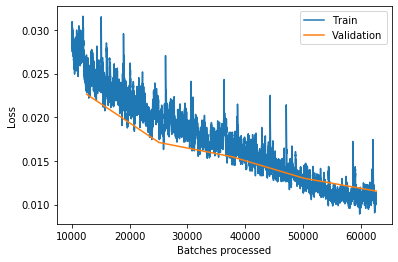

In [57]:
learn.recorder.plot_losses(skip_start=10000)

In [42]:
learn.load('1');

In [44]:
learn.model.embeds[0].weight.data

tensor([[-2.2758e-06,  7.2019e-06,  1.0166e-05,  ..., -9.7132e-06,
          4.8964e-08, -1.7303e-05],
        [-5.9717e-03,  2.0969e-02,  8.8824e-03,  ...,  1.4849e-03,
         -4.5382e-02,  1.2406e-02],
        [-6.0217e-03, -3.0232e-02,  9.9684e-04,  ...,  2.1285e-02,
          8.1617e-03, -1.5183e-03],
        ...,
        [-1.0954e-03,  9.3255e-03,  1.3032e-02,  ..., -4.0584e-02,
         -7.2143e-03,  2.2067e-02],
        [-2.8479e-02, -3.1046e-03,  3.8919e-02,  ..., -3.6458e-02,
          3.2687e-02,  7.3279e-02],
        [-2.9712e-03,  1.3908e-02,  2.1988e-03,  ...,  5.7139e-03,
         -2.7856e-02,  4.1855e-02]])

In [ ]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.012393,0.016367,0.116766,13:39
